## Import

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import mysql.connector
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import joblib
from joblib import dump, load
from sklearn.ensemble import RandomForestRegressor

In [2]:
with open('../config.env') as f:
        credentials=f.read()
        credentials = credentials.split(" ")
        con=mysql.connector.connect(username=credentials[0],password=credentials[1],host=credentials[2],port=int(credentials[3]),database=credentials[4])
        query=con.cursor()

In [3]:
sql = "SELECT * FROM total_india_cases"
query.execute(sql)
result=query.fetchall()
coloumn

NameError: name 'coloumn' is not defined

In [4]:
result

[(1,
  datetime.date(2020, 1, 30),
  737454,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0),
 (2,
  datetime.date(2020, 2, 2),
  737457,
  2,
  2,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  2,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0),
 (3,
  datetime.date(2020, 2, 3),
  737458,
  3,
  3,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  3,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0),
 (4,
  datetime.date(2020, 2, 14),
  737469,
  3,
  0,
  3,
  0,
  0,
  0,
  -3,
  3,
  0,
  0,
  0,
  -3,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0),
 (5,
  datetime.date(2020, 3, 2),
  737486,
  5,
  2,
  3,
  0,
  0,
  2,
  2,
  0,
  0,
  0,
  2,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0),
 (6,
  datetime.date(2020, 3, 3),
  737487,
  6,
  3,
  3,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  3,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0),
 (7,
 

In [5]:
query.description

[('index_no', 3, None, None, None, None, 0, 49667),
 ('date', 10, None, None, None, None, 0, 4225),
 ('ordinal_date', 3, None, None, None, None, 0, 36865),
 ('total_confirmed', 3, None, None, None, None, 0, 36865),
 ('total_active', 3, None, None, None, None, 0, 36865),
 ('total_recovered', 3, None, None, None, None, 0, 36865),
 ('total_deaths', 3, None, None, None, None, 0, 36865),
 ('total_tested', 3, None, None, None, None, 0, 36865),
 ('delta_confirmed', 3, None, None, None, None, 0, 36865),
 ('delta_active', 3, None, None, None, None, 0, 36865),
 ('delta_recovered', 3, None, None, None, None, 0, 36865),
 ('delta_deaths', 3, None, None, None, None, 0, 36865),
 ('delta_tested', 3, None, None, None, None, 0, 36865),
 ('delta7_confirmed', 3, None, None, None, None, 0, 36865),
 ('delta7_active', 3, None, None, None, None, 0, 36865),
 ('delta7_recovered', 3, None, None, None, None, 0, 36865),
 ('delta7_deaths', 3, None, None, None, None, 0, 36865),
 ('delta7_tested', 3, None, None, None

In [6]:
column=[columns[0] for columns in query.description]

In [7]:
column

['index_no',
 'date',
 'ordinal_date',
 'total_confirmed',
 'total_active',
 'total_recovered',
 'total_deaths',
 'total_tested',
 'delta_confirmed',
 'delta_active',
 'delta_recovered',
 'delta_deaths',
 'delta_tested',
 'delta7_confirmed',
 'delta7_active',
 'delta7_recovered',
 'delta7_deaths',
 'delta7_tested',
 'total_vaccinated1',
 'total_vaccinated2',
 'delta_vaccinated1',
 'delta_vaccinated2',
 'delta7_vaccinated1',
 'delta7_vaccinated2',
 'total_other',
 'delta_other',
 'delta7_other']

In [8]:
data = pd.DataFrame(result,columns=column)

In [9]:
data

,index_no,date,ordinal_date,total_confirmed,total_active,total_recovered,total_deaths,total_tested,delta_confirmed,delta_active,...,delta7_tested,total_vaccinated1,total_vaccinated2,delta_vaccinated1,delta_vaccinated2,delta7_vaccinated1,delta7_vaccinated2,total_other,delta_other,delta7_other
0,1,2020-01-30,737454,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,2020-02-02,737457,2,2,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,2020-02-03,737458,3,3,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,2020-02-14,737469,3,0,3,0,0,0,-3,...,0,0,0,0,0,0,0,0,0,0
4,5,2020-03-02,737486,5,2,3,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,559,2021-09-07,738040,33095455,384603,32256563,441443,534943093,38135,-1331,...,11758800,540557826,166985192,5842003,2638239,37226299,16203211,12846,-3,52
559,560,2021-09-08,738041,33138856,387035,32297183,441782,536817243,43401,2432,...,11948509,546897006,169700422,6339180,2715230,37097380,16462714,12856,10,48
560,561,2021-09-09,738042,33163007,386515,32321580,442040,538604854,24151,-520,...,12069786,551843120,171941466,4946114,2241044,36311782,16512836,12872,16,57
561,562,2021-09-10,738043,33200882,387395,32358251,442350,540196989,37875,880,...,11956951,556541427,174048261,4698307,2106795,36675214,16703269,12886,14,66


In [10]:
data.describe()

,index_no,ordinal_date,total_confirmed,total_active,total_recovered,total_deaths,total_tested,delta_confirmed,delta_active,delta_recovered,...,delta7_tested,total_vaccinated1,total_vaccinated2,delta_vaccinated1,delta_vaccinated2,delta7_vaccinated1,delta7_vaccinated2,total_other,delta_other,delta7_other
count,563.000000,563.000000,5.630000e+02,5.630000e+02,5.630000e+02,563.000000,5.630000e+02,563.000000,563.000000,563.000000,...,5.630000e+02,5.630000e+02,5.630000e+02,5.630000e+02,5.630000e+02,5.630000e+02,5.630000e+02,563.000000,563.000000,563.000000
mean,282.000000,737762.829485,1.153823e+07,6.090246e+05,1.076974e+07,155206.731794,1.740087e+08,59026.843694,675.786856,57541.865009,...,6.670173e+06,7.894380e+07,2.067200e+07,9.902914e+05,3.115536e+05,6.775259e+06,2.102286e+06,4262.030195,22.891652,159.907638
std,162.668374,162.974779,1.117944e+07,7.826570e+05,1.076652e+07,141628.034880,1.637075e+08,82065.954790,33298.312773,80143.490780,...,4.712001e+06,1.406256e+08,3.983669e+07,1.685774e+06,6.054486e+05,1.069840e+07,3.832118e+06,4628.465618,72.139944,285.989769
min,1.000000,737454.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,-163784.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-242.000000,-37.000000
25%,141.500000,737622.500000,1.023036e+06,1.655485e+05,6.453480e+05,25938.000000,1.325323e+07,13399.000000,-4972.000000,12859.000000,...,2.087484e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,382.500000,1.000000,11.000000
50%,282.000000,737763.000000,9.608521e+06,3.919550e+05,9.058061e+06,139738.000000,1.458855e+08,37654.000000,404.000000,36582.000000,...,6.861478e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2329.000000,9.000000,62.000000
75%,422.500000,737903.500000,1.677747e+07,6.927100e+05,1.397027e+07,190929.500000,2.770590e+08,62246.500000,5464.500000,61820.500000,...,1.109811e+07,1.177584e+08,2.188972e+07,1.522352e+06,3.073085e+05,1.258839e+07,2.019110e+06,7018.000000,18.000000,130.500000
max,563.000000,738044.000000,3.323217e+07,3.741267e+06,3.239614e+07,442688.000000,5.418058e+08,414280.000000,137742.000000,422391.000000,...,2.156277e+07,5.611020e+08,1.771054e+08,1.031076e+07,3.274102e+06,4.291877e+07,1.698282e+07,12891.000000,1356.000000,1445.000000


<AxesSubplot:xlabel='date'>

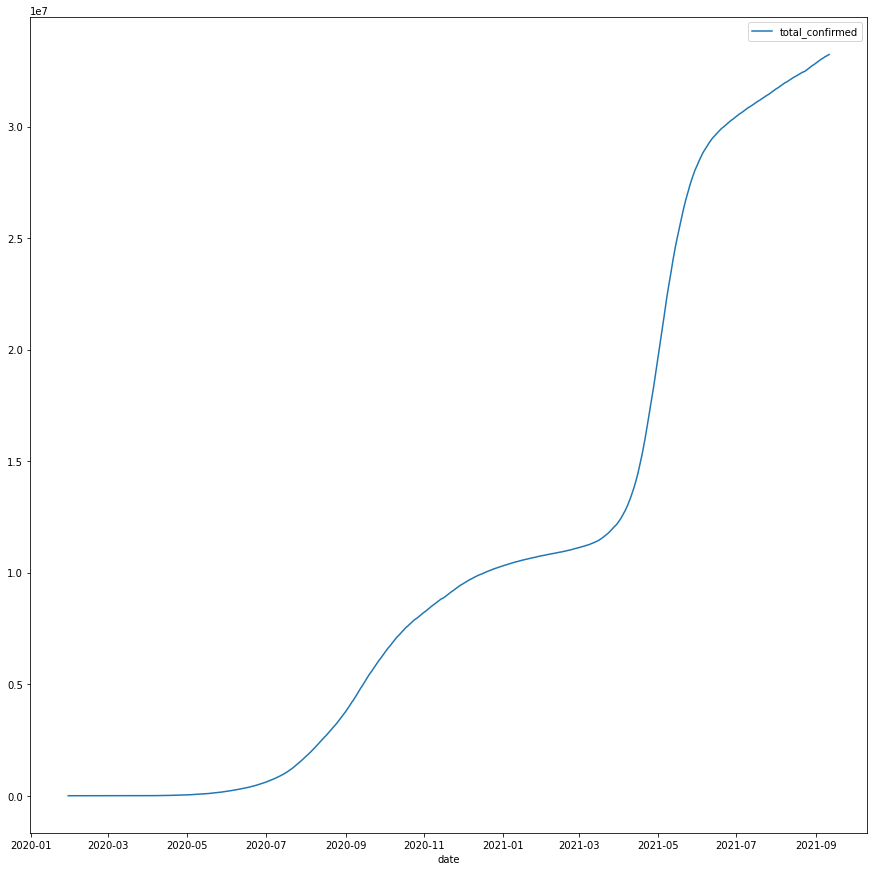

In [11]:
data.plot(kind='line',x='date',y='total_confirmed',figsize=(15,15))

<AxesSubplot:xlabel='date'>

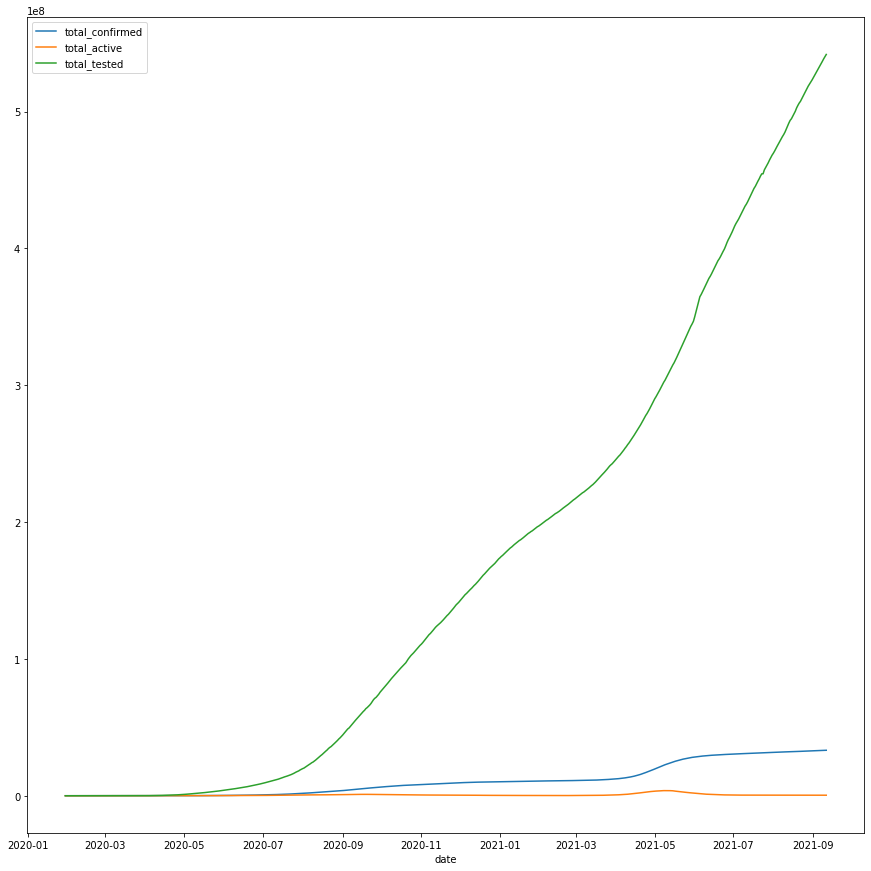

In [12]:
data.plot(kind='line',x='date',y=['total_confirmed','total_active','total_tested'],figsize=(15,15))

<AxesSubplot:xlabel='date'>

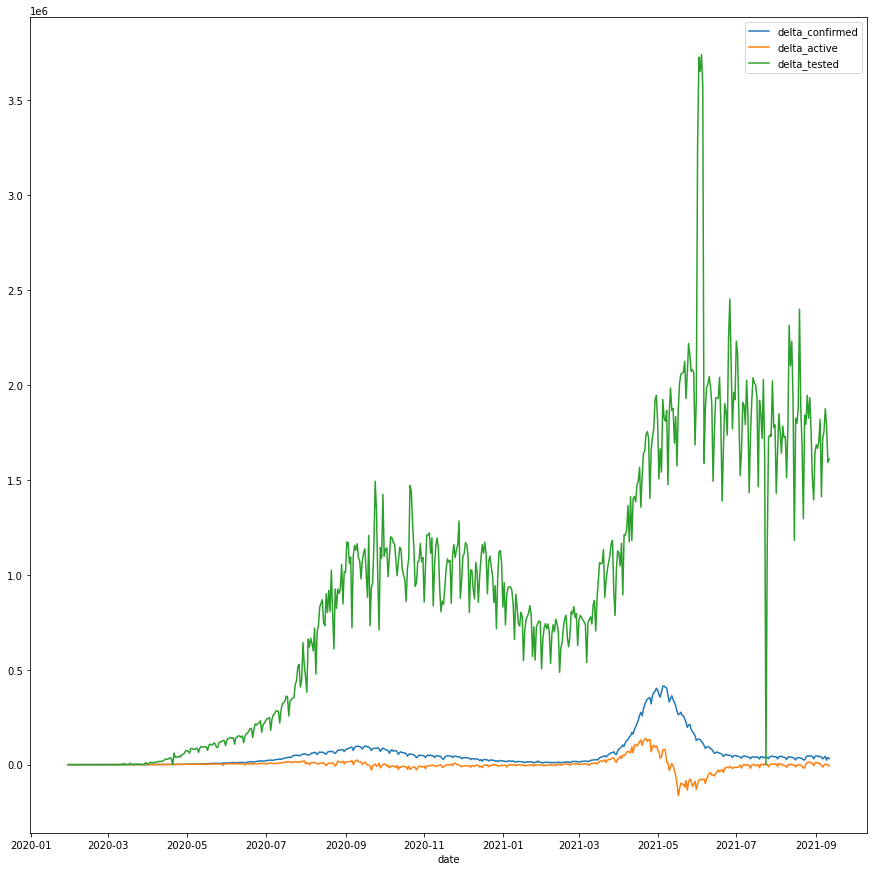

In [13]:
data.plot(kind='line',x='date',y=['delta_confirmed','delta_active','delta_tested'],figsize=(15,15))

<AxesSubplot:xlabel='date'>

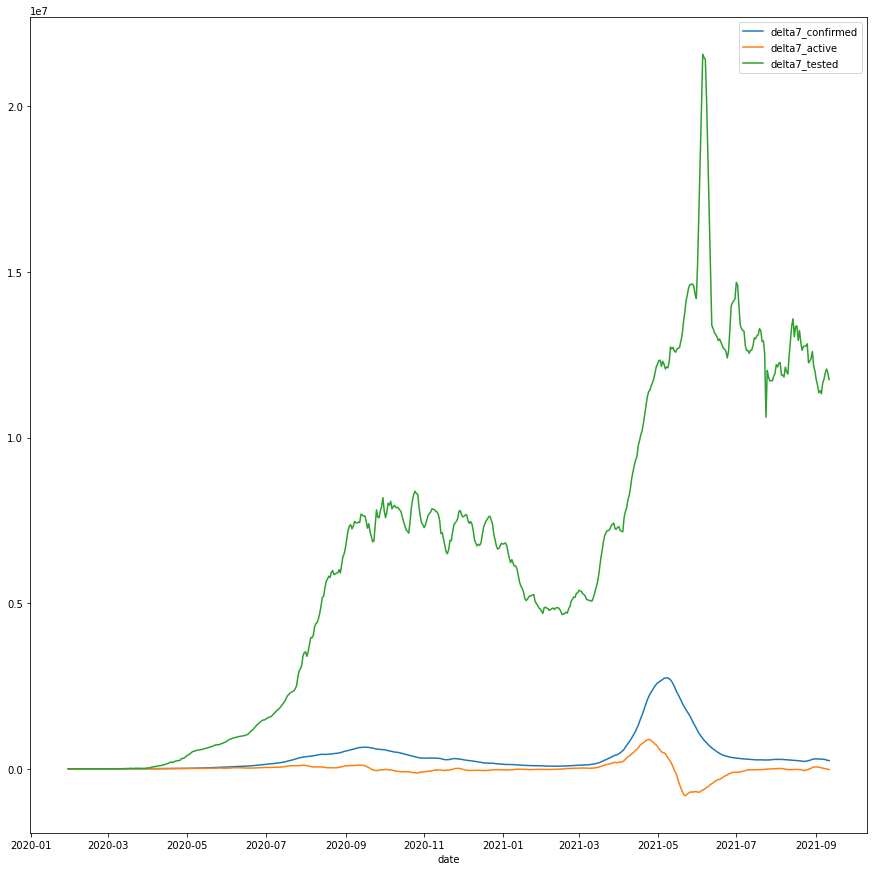

In [14]:
data.plot(kind='line',x='date',y=['delta7_confirmed','delta7_active','delta7_tested'],figsize=(15,15))

In [15]:
data.corr()

,index_no,ordinal_date,total_confirmed,total_active,total_recovered,total_deaths,total_tested,delta_confirmed,delta_active,delta_recovered,...,delta7_tested,total_vaccinated1,total_vaccinated2,delta_vaccinated1,delta_vaccinated2,delta7_vaccinated1,delta7_vaccinated2,total_other,delta_other,delta7_other
index_no,1.000000,0.999922,0.939633,0.395065,0.934157,0.942270,0.963955,0.383267,-0.077392,0.419334,...,0.892872,0.763022,0.725117,0.732931,0.684900,0.793758,0.730750,0.927549,0.187269,0.338952
ordinal_date,0.999922,1.000000,0.938948,0.395138,0.933449,0.941647,0.963257,0.383300,-0.077225,0.419299,...,0.892677,0.762176,0.724298,0.732169,0.684151,0.792930,0.729951,0.926770,0.187249,0.338900
total_confirmed,0.939633,0.938948,1.000000,0.372158,0.997791,0.994434,0.983477,0.332851,-0.223255,0.427855,...,0.903665,0.891254,0.855763,0.801779,0.766959,0.869572,0.821919,0.990156,0.145319,0.280061
total_active,0.395065,0.395138,0.372158,1.000000,0.309687,0.295564,0.307570,0.972344,0.010403,0.979460,...,0.567518,0.166564,0.134707,0.153116,0.190634,0.173688,0.228980,0.377715,0.395573,0.729784
total_recovered,0.934157,0.933449,0.997791,0.309687,1.000000,0.997512,0.985460,0.271385,-0.229659,0.368284,...,0.884967,0.901138,0.867044,0.810478,0.772029,0.878453,0.825588,0.987384,0.120563,0.234704
total_deaths,0.942270,0.941647,0.994434,0.295564,0.997512,1.000000,0.984828,0.258335,-0.215229,0.349191,...,0.891676,0.897492,0.865126,0.803720,0.771939,0.871613,0.824918,0.977562,0.114422,0.221785
total_tested,0.963955,0.963257,0.983477,0.307570,0.985460,0.984828,1.000000,0.294829,-0.119490,0.347069,...,0.859931,0.889138,0.857323,0.816588,0.789415,0.885825,0.841829,0.980000,0.142724,0.264363
delta_confirmed,0.383267,0.383300,0.332851,0.972344,0.271385,0.258335,0.294829,1.000000,0.231021,0.916936,...,0.513866,0.159077,0.120026,0.161774,0.223289,0.190750,0.252880,0.348002,0.430363,0.766082
delta_active,-0.077392,-0.077225,-0.223255,0.010403,-0.229659,-0.215229,-0.119490,0.231021,1.000000,-0.176383,...,-0.218046,-0.103476,-0.130832,-0.050805,0.097899,-0.010916,0.072427,-0.194853,0.172708,0.220574
delta_recovered,0.419334,0.419299,0.427855,0.979460,0.368284,0.349191,0.347069,0.916936,-0.176383,1.000000,...,0.608721,0.202967,0.174841,0.184000,0.185659,0.196935,0.226133,0.431481,0.363898,0.684661


In [16]:
def train_test_split(data,train_ratio):
    length = len(data)
    training_index = int(length*train_ratio)
    training_set = data[:training_index]
    testing_set = data[training_index:]
    return training_set,testing_set

In [17]:
training_data,testing_data=train_test_split(data,0.9)

In [18]:
len(training_data)

506

In [19]:
len(testing_data)

57

In [20]:
training_data.value_counts()

index_no  date        ordinal_date  total_confirmed  total_active  total_recovered  total_deaths  total_tested  delta_confirmed  delta_active  delta_recovered  delta_deaths  delta_tested  delta7_confirmed  delta7_active  delta7_recovered  delta7_deaths  delta7_tested  total_vaccinated1  total_vaccinated2  delta_vaccinated1  delta_vaccinated2  delta7_vaccinated1  delta7_vaccinated2  total_other  delta_other  delta7_other
1         2020-01-30  737454        1                1             0                0             0             1                 1            0                0             0             1                  1             0                 0              0              0                  0                  0                  0                  0                   0                   0            0            0               1
333       2021-01-24  737814        10668676         181475        10329244         153508        192337117     13232            -53           1314

In [21]:
testing_data.value_counts()

index_no  date        ordinal_date  total_confirmed  total_active  total_recovered  total_deaths  total_tested  delta_confirmed  delta_active  delta_recovered  delta_deaths  delta_tested  delta7_confirmed  delta7_active  delta7_recovered  delta7_deaths  delta7_tested  total_vaccinated1  total_vaccinated2  delta_vaccinated1  delta_vaccinated2  delta7_vaccinated1  delta7_vaccinated2  total_other  delta_other  delta7_other
507       2021-07-17  737988        31105278         417054        30262243         413640        443958663     41283            -1305         42051            517           1936709       269016            -31369         294717            5568           13073193       321893762          83037953           3228536            2007300            18722264            10176865            12341         20          100             1
536       2021-08-15  738017        32225212         376460        31404401         431674        494805652     33245            -3111         3593

In [22]:
features_data = training_data[['ordinal_date','delta_tested',]]

In [23]:
features_data

,ordinal_date,delta_tested
0,737454,0
1,737457,0
2,737458,0
3,737469,0
4,737486,0
...,...,...
501,737983,1740325
502,737984,1915501
503,737985,2038319
504,737986,2011281


In [24]:
labels = training_data['total_confirmed']

In [25]:
labels

0             1
1             2
2             3
3             3
4             5
         ...   
501    30904734
502    30945048
503    30986807
504    31025878
505    31063995
Name: total_confirmed, Length: 506, dtype: int64

In [26]:
features=features_data.to_numpy()

In [27]:
features

array([[ 737454,       0],
       [ 737457,       0],
       [ 737458,       0],
       ...,
       [ 737985, 2038319],
       [ 737986, 2011281],
       [ 737987, 1998715]], dtype=int64)

## Model

In [28]:
model = RandomForestRegressor()

In [29]:
model.fit(features,labels)

RandomForestRegressor()

In [43]:
model.predict([[738047,2229789]])
#24579032.31113815
#array([31042464.05])

array([31027035.84])

In [31]:
test_features=testing_data[['ordinal_date','delta_tested']].to_numpy()

In [32]:
test_label=testing_data['total_confirmed']

In [33]:
predicted = model.predict(test_features)

In [34]:
predicted

array([31022961.33, 30989262.94, 31017879.95, 30990078.65, 30991643.37,
       31025530.39, 30990495.66, 30989262.94, 30989262.94, 30991643.37,
       30991643.37, 30991643.37, 31030600.08, 30990117.11, 30990117.11,
       30989262.94, 30989742.58, 30990078.65, 30991643.37, 30989742.58,
       30990117.11, 30991643.37, 30991643.37, 30989262.94, 30990117.11,
       31027035.84, 31027035.84, 31027035.84, 31021065.17, 30989262.94,
       30988062.95, 30988062.95, 30999567.96, 31027035.84, 31003202.28,
       30989742.58, 30989262.94, 30990078.65, 30988062.95, 31024466.78,
       30988062.95, 31022961.33, 30991643.37, 30989262.94, 30989262.94,
       30989742.58, 30989742.58, 30989742.58, 30989742.58, 30988062.95,
       30989262.94, 30991643.37, 30991643.37, 30999567.96, 30990117.11,
       30990495.66, 30990495.66])

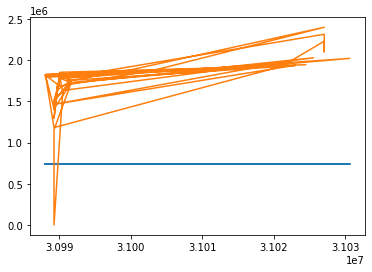

In [35]:
plt.plot(predicted,test_features)

## evaluation

In [36]:
mean_squared_error_eval = mean_squared_error(test_label,predicted)

In [37]:
mean_squared_error_eval

1777581587788.0842

In [38]:
np.sqrt(mean_squared_error_eval)

1333259.7600573131

In [39]:
mean_abs_error_eval = mean_absolute_error(test_label,predicted)

In [40]:
mean_abs_error_eval

1176920.2985964913

In [41]:
np.sqrt(mean_abs_error_eval)

1084.8595755195652

## save model

In [42]:
Random_Forest_model_for_total_confirmed_cases_with_respect_to_date_and_total_tested=joblib.dump(model,'Random_Forest_model_for_total_confirmed_cases_with_respect_to_date_and_total_tested.joblib')